#**~ TAMAN NASIONAL GUNUNG LEUSER ~**#

By : Farras Fadhilah (2106723565)

##**INTRODUCTION**

Analisis dilakukan untuk Kawasan Taman Nasional Gunung Leuser dengan memanfaatkan GEEMAP Library. Berikut adalah proses-proses utama yang dilakukan dalam analisis ini :    

1. Pengenalan geemap dan Earth Engine Python API:

  - Membuat sebuah peta interaktif menggunakan geemap yang menampilkan lokasi Taman Nasional Gunung Leuser.
  - Menjelaskan secara singkat mengenai geemap dan Earth Engine Python API dalam konteks penggunaannya untuk analisis geospasial.

2. Menciptakan peta interaktif:

  - Menampilkan Taman Nasional Gunung Leuser dengan menggunakan koordinat batas kawasan tersebut. Pastikan peta Anda menunjukkan detail topografi dan vegetasi.

3. Mencari Katalog Data GEE:

  - Mencari dataset pada GEE yang berkaitan dengan tutupan lahan dan penggunaan lahan di Taman Nasional Gunung Leuser dari tahun 2000 hingga 2020. Jelaskan bagaimana Anda menemukan dataset tersebut.

4. Menampilkan Dataset GEE:

  - Memvisualisasikan perubahan tutupan lahan di Taman Nasional Gunung Leuser berdasarkan dataset yang Anda temukan.

5. Mengklasifikasikan Citra Menggunakan Algoritma Machine Learning:

  - Melakukan klasifikasi tutupan lahan menggunakan salah satu algoritma machine learning yang tersedia di GEE. Jelaskan algoritma yang Anda pilih dan mengapa.

6. Menghitung Statistik dan Mengekspor Hasil:

  - Menghitung statistik perubahan tutupan lahan di kawasan tersebut dan ekspor hasilnya dalam format yang dapat dibagikan.

7. Menghasilkan Peta Kualitas Publikasi:

  - Membuat sebuah peta dinamik yang menunjukkan perubahan tutupan lahan di Taman Nasional Gunung Leuser dari tahun 2000 hingga 2020.

8. Mengekstraksi Lebar dan Garis Tengah Sungai:

  - Menggunakan GEE untuk mengekstrak informasi mengenai lebar dan garis tengah dari salah satu sungai utama di Taman Nasional Gunung Leuser. Jelaskan metodologi yang Anda gunakan.

##**PREPARATION**

In [ ]:
# GEEMAP Installation
%pip install geemap pygis mapclassify

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 82.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 79.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 95.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.2/107.2 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.1/233.1 kB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 42.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 102.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Import Libraries
import ee
import geemap
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
geemap.ee_initialize()

In [ ]:
# Colab Setup
geemap.get_ee_token()

##**PROCESSING**

###`1. Pengenalan geemap dan Earth Engine Python API:`

Membuat sebuah peta interaktif menggunakan geemap yang menampilkan lokasi Taman Nasional Gunung Leuser.

Dengan memanfaatkan geemap dan Earth Engine Python API, dapat membantu analisis mulai dari mengumpulkan, mengolah hingga analisis akhir berbagai data, terutama mendukung data raster juga yang tersedia dalam Earth Engine Dataset.

In [ ]:
# Load Data Batas Taman Nasional Gunung Leuser.
in_shp = "WDPA_Leuser.shp"
fc = geemap.shp_to_ee(in_shp)

In [ ]:
# Membuat Peta interaktif
m = geemap.Map(center=[3.5, 97.55], zoom=8.5)

# Menambahkan Basemap
m.add_basemap('HYBRID')

# Menampilkan Lokasi Taman Nasional Gunung Leuser
leuser_coords = ee.Geometry.Polygon(
    [[[96.7734054, 4.1118850 ],
      [98.8696981, 4.1138064 ],
      [98.8696981, 2.8763981 ],
      [96.7753268, 2.8763981 ]]])

# Menambahkan Layer Taman Nasional Gunung Leuser ke Peta
m.add_layer(fc, {'color' : "white", 'opacity': 0.9}, "Batas Taman Nasional Gunung Leuser")
m.add_layer(leuser_coords, {'color': 'red', 'opacity': 0.3}, 'Taman Nasional Gunung Leuser')
m

Map(center=[3.5, 97.55], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(…

###`2. Menciptakan Peta Interaktif`

Menampilkan Taman Nasional Gunung Leuser dengan menggunakan koordinat batas kawasan tersebut. Pastikan peta menunjukkan detail **topografi** dan **vegetasi**.

In [ ]:
# Menambahkan Detail Topografi Dengan Data DEM
dem = ee.Image("USGS/SRTMGL1_003").clip(leuser_coords)

# Menambahkan Layer DEM ke Peta
vis_params = {
"min": 0,
"max": 4000,
"palette": ["006633", "E5FFCC", "662A00", "D8D8D8", "F5F5F5"],
}

m.add_layer(dem, vis_params, "Topografi")
m.add_layer(fc, {'color' : "red", 'opacity': 0.5}, "Batas Taman Nasional Gunung Leuser")
m

Map(bottom=64561.0, center=[3.5, 97.55], controls=(WidgetControl(options=['position', 'transparent_bg'], widge…

In [ ]:
# Menambahkan Detail Vegetasi Dengan Menggunakan Data NDVI dari Landsat 8
landsat8 = ee.ImageCollection('LANDSAT/LC08/C01/T1_SR')

# Mendefinisikan Fungsi untuk NDVi
def calculate_ndvi(image):
  ndvi = image.normalizedDifference(['B5', 'B4']).rename('NDVI')
  return image.addBands(ndvi)

# Menghitung NDVI
landsat8_ndvi = landsat8.map(calculate_ndvi)

latest_ndvi = landsat8_ndvi.qualityMosaic('NDVI').clip(leuser_coords)

# Menambahkan Layer NDVI ke Peta
ndvi_params = {
  'min': 0,
  'max': 1,
  'palette': ['blue', 'white', 'green']
}
m.addLayer(latest_ndvi.select('NDVI'), ndvi_params, 'Vegetasi')
m.add_layer(fc, {'color' : "red", 'opacity': 0.5}, "Batas Taman Nasional Gunung Leuser")
m

Map(bottom=64561.0, center=[3.4997138463498842, 97.54898071289062], controls=(WidgetControl(options=['position…

###`3. Mencari Katalog Data GEE:`

Mencari dataset pada GEE yang berkaitan dengan tutupan lahan dan penggunaan lahan di Taman Nasional Gunung Leuser dari tahun 2000 hingga 2020.

Dalam proses ini, dilakukan pencarian data di GEE berupa dataset yang berkaitan dengan tutupan lahan, atau dapat membantu dalam analisis tutupan lahan. Sehingga dipilih dataset yang tersedia secara global agar mencakup Taman Nasional Gunung Leuser, lalu terdapat nilai reflectance sebagai analisis permukaan, serta memilih data pada rentang tahun yang diinginkan.

In [ ]:
# Membaca List Data Dari Earth Engine Dataset
url = 'https://github.com/samapriya/Earth-Engine-Datasets-List/raw/master/gee_catalog.csv'
df = pd.read_csv(url)

In [ ]:
# Memfilter Hanya Pada tags Yang Berkaitan Untuk Analisis Tutupan Lahan
filtered_df = df[df['tags'].str.contains( 'reflectance', 'global')]

# Memfilter Hanya Pada startyear dan endyear
filtered_df = filtered_df[(filtered_df['startyear'] <= 2000) & (df['endyear'] >= 2020)]

# Tampilkan hasil filter
print(filtered_df)

                                   id  \
376            LANDSAT/LE07/C01/T1_SR   
379            LANDSAT/LE07/C01/T2_SR   
382            LANDSAT/LE07/C02/T1_L2   
387            LANDSAT/LE07/C02/T2_L2   
603                 MODIS/006/MCD43A1   
604                 MODIS/006/MCD43A2   
606                 MODIS/006/MCD43A4   
610                 MODIS/006/MOD09A1   
611                 MODIS/006/MOD09GA   
612                 MODIS/006/MOD09GQ   
613                 MODIS/006/MOD09Q1   
629                 MODIS/006/MODOCGA   
657                 MODIS/061/MCD43A1   
658                 MODIS/061/MCD43A2   
660                 MODIS/061/MCD43A4   
664                 MODIS/061/MOD09A1   
665                MODIS/061/MOD09CMG   
666                 MODIS/061/MOD09GA   
667                 MODIS/061/MOD09GQ   
668                 MODIS/061/MOD09Q1   
808  NASA/OCEANDATA/MODIS-Terra/L3SMI   
831            NOAA/CDR/GRIDSAT-B1/V2   
835              NOAA/CDR/PATMOSX/V53   

               

In [ ]:
# Memilih ImageCollection Yang Akan Dipakai
print(filtered_df['id'].tolist())

['LANDSAT/LE07/C01/T1_SR', 'LANDSAT/LE07/C01/T2_SR', 'LANDSAT/LE07/C02/T1_L2', 'LANDSAT/LE07/C02/T2_L2', 'MODIS/006/MCD43A1', 'MODIS/006/MCD43A2', 'MODIS/006/MCD43A4', 'MODIS/006/MOD09A1', 'MODIS/006/MOD09GA', 'MODIS/006/MOD09GQ', 'MODIS/006/MOD09Q1', 'MODIS/006/MODOCGA', 'MODIS/061/MCD43A1', 'MODIS/061/MCD43A2', 'MODIS/061/MCD43A4', 'MODIS/061/MOD09A1', 'MODIS/061/MOD09CMG', 'MODIS/061/MOD09GA', 'MODIS/061/MOD09GQ', 'MODIS/061/MOD09Q1', 'NASA/OCEANDATA/MODIS-Terra/L3SMI', 'NOAA/CDR/GRIDSAT-B1/V2', 'NOAA/CDR/PATMOSX/V53']


### `4. Menampilkan Dataset GEE`

Memvisualisasikan perubahan tutupan lahan di Taman Nasional Gunung Leuser berdasarkan dataset yang  telah ditemukan.

In [ ]:
# Mengecek Band Yang Tersedia Pada Dataset
landsat7 = ee.ImageCollection('LANDSAT/LE07/C01/T1_SR') \
           .filterDate('2000-01-01', '2020-12-31')
print(landsat7.first().bandNames().getInfo())

['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'sr_atmos_opacity', 'sr_cloud_qa', 'pixel_qa', 'radsat_qa']


In [ ]:
# Mendefinisikan Fungsi Untuk Mendapatkan Citra Median Per Tahun
def get_landsat_yearly_median(year):
    start_date = f'{year}-01-01'
    end_date = f'{year}-12-31'
    landsat_yearly = ee.ImageCollection('LANDSAT/LE07/C01/T1_SR') \
        .filterBounds(leuser_coords) \
        .filterDate(start_date, end_date) \
        .filter(ee.Filter.lt('CLOUD_COVER', 20)) \
        .median() \
        .clip(leuser_coords)
    return landsat_yearly

# Membuat Peta Interaktif Untuk Dataset GEE (Landsat 7)
map = geemap.Map(center=[3.5, 97.55], zoom=8.5)

# Memvisualisasikan Datasaet GEE (Landsat 7)
landsat_vis_params = {
    'bands': ['B3', 'B2', 'B1'],  # Menggunakan band True Color (B3: Red, B2: Green, B1: Blue)
    'min': 0,
    'max': 3000,
    'gamma': 1.4,
}

# Menambahkan Citra Median Setiap Tahun (2000 hingga 2020) ke Peta
for year in range(2000, 2021):
    landsat_yearly = get_landsat_yearly_median(year)
    map.add_layer(landsat_yearly, landsat_vis_params, f'Landsat 7 {year}')

# Menambahkan Batas Kawasan Gunung Leuser
map.add_layer(fc, {'color': 'red', 'opacity': 0.3}, 'Gunung Leuser')
map

Map(center=[3.5, 97.55], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(…

###`5. Mengklasifikasikan Citra Menggunakan Algoritma Machine Learning.`

Melakukan klasifikasi tutupan lahan menggunakan salah satu algoritma machine learning yang tersedia di GEE yaitu Random Forest.

Algoritma Random Forest merupakan salah satu algoritma yang biasa digunakan dalam melakukan klasifikasi, terutama kelebihannya dalam mengolah data yang beragam serta dapat dengan skala luas, atau data yang banyak. Dengan menggunakan decision tree, dapat membantu meminimalkan noise, terutama pada data citra yang memiliki could cover. Sehingga dalam analisis tutupan lahan sangat membantu untuk klasifikasi lebih baik.

In [ ]:
# Menentukan Titik Training
file_path = 'TitikSampel.csv'
df = pd.read_csv(file_path)

# Mendifinisikan Fungsi Untuk Membuat Features Dalam Dataframe
def create_feature(row):
    return ee.Feature(ee.Geometry.Point([row['longtitude'], row['latitude']]), {'landcover': row['landcover']})

# Mengkonversi Dataframe Menjadi list dari ee.Feature
features = df.apply(create_feature, axis=1).tolist()

# Membuat ee.FeatureCollection Dari List Features
Training_collection = ee.FeatureCollection(features)

# Print
print(Training_collection.getInfo())

# Membuat Peta Interaktif
map = geemap.Map(center=[df['latitude'].mean(), df['longtitude'].mean()], zoom=10)

# Menambahkan FeatureCollection ke Peta
map.add_layer(Training_collection, {'color': 'red'}, 'Sample Points')
map.add_layer(leuser_coords, {'color' : "red", 'opacity': 0.5}, "Batas Taman Nasional Gunung Leuser")
# Display the map
map

{'type': 'FeatureCollection', 'columns': {'landcover': 'Integer', 'system:index': 'String'}, 'features': [{'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [97.5847557, 3.7204053]}, 'id': '0', 'properties': {'landcover': 0}}, {'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [97.5841304, 3.719709]}, 'id': '1', 'properties': {'landcover': 0}}, {'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [97.5931282, 3.7214334]}, 'id': '2', 'properties': {'landcover': 0}}, {'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [97.5940777, 3.7257621]}, 'id': '3', 'properties': {'landcover': 0}}, {'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [97.6008335, 3.731174]}, 'id': '4', 'properties': {'landcover': 0}}, {'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [97.6003155, 3.7310459]}, 'id': '5', 'properties': {'landcover': 0}}, {'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [97.6029702, 3.726320

Map(center=[3.6308524333333327, 97.59185202444444], controls=(WidgetControl(options=['position', 'transparent_…

In [ ]:
# Menambahkan titik sampel untuk setiap kelas tutupan lahan
training_samples = Training_collection

# Ekstrak nilai pixel untuk titik sampel
training = landsat_yearly.sampleRegions(
     collection=training_samples,
     properties=['landcover'],
     scale=30
  )

# Inisialisasi algoritma Random Forest
classifier = ee.Classifier.smileRandomForest(numberOfTrees=100).train(
     features=training,
     classProperty='landcover',
     inputProperties=landsat_yearly.bandNames()
  )

# Membuat peta terpisah untuk setiap tahun
map_year = geemap.Map(center=[3.8, 97.3], zoom=10)

# Loop untuk setiap tahun
for year in range(2000, 2021):
    # Dapatkan citra median untuk tahun tertentu
    landsat_yearly = get_landsat_yearly_median(year)

    # Terapkan model ke citra
    classified = landsat_yearly.classify(classifier)

    # Tambahkan hasil klasifikasi ke peta tahun ini
    map_year.addLayer(classified, {'min': 0, 'max': 2, 'palette': ['yellow', 'green', 'blue']}, f'Classified {year}')

    # Menambahkan batas kawasan Gunung Leuser
    map_year.addLayer(fc, {'color': 'red', 'opacity': 0.3}, 'Batas Taman Nasional Gunung Leuser')

In [ ]:
# Menambahkan batas kawasan Gunung Leuser
map_year.addLayer(fc, {'color': 'red', 'opacity': 0.5}, 'Batas Taman Nasional Gunung Leuser')
map_year

Map(center=[3.8, 97.3], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(c…

###`6. Menghitung Statistik dan Mengekspor Hasil:`

Menghitung statistik perubahan tutupan lahan di kawasan tersebut dan ekspor hasilnya dalam format yang dapat dibagikan.

In [ ]:
# Menghitung statistik perubahan tutupan lahan
stats = classified.reduceRegion(
    reducer=ee.Reducer.frequencyHistogram(),
    geometry=leuser_coords,
    scale=500,
    maxPixels=1e8
)
print('Landcover statistics:', stats.getInfo())

Landcover statistics: {'classification': {'0': 27192.882352939243, '1': 36764.97254901605, '2': 43734.447058819766}}


In [ ]:
# Mengumpulkan data yang diperlukan
geometry = leuser_coords
training_samples = Training_collection

# Membuat dictionary untuk menyimpan hasil area setiap tahun
area_dict = {'year': [], 'class_0': [], 'class_1': [], 'class_2': []}

# Ekstrak nilai pixel untuk titik sampel
training = landsat_yearly.sampleRegions(
     collection=training_samples,
     properties=['landcover'],
     scale=30
  )

# Inisialisasi algoritma Random Forest
classifier = ee.Classifier.smileRandomForest(numberOfTrees=100).train(
     features=training,
     classProperty='landcover',
     inputProperties=landsat_yearly.bandNames()
  )

# Loop untuk setiap tahun
for year in range(2000, 2021):
    # Dapatkan citra median untuk tahun tertentu
    landsat_yearly = get_landsat_yearly_median(year)

    # Terapkan model ke citra
    classified = landsat_yearly.classify(classifier)
    # Hitung area untuk setiap kelas
    area_stats = classified.reduceRegion(
        reducer=ee.Reducer.frequencyHistogram(),
        geometry=geometry,
        scale=30,
        maxPixels=1e9
    ).getInfo()

    # Ambil total area per kelas
    class_areas = area_stats['classification']

    # Menambahkan hasil ke dictionary
    area_dict['year'].append(year)
    area_dict['class_0'].append(class_areas.get('0'))
    area_dict['class_1'].append(class_areas.get('1'))
    area_dict['class_2'].append(class_areas.get('2'))

In [ ]:
print(area_dict)

{'year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], 'class_0': [2026758.2941176472, 13321551.070588233, 12272375.33333333, 12775445.576470587, 8373825.529411764, 8390431.117647063, 6174075.662745097, 10266226.20392157, 1036667.8039215684, 13652962.54509803, 11680787.654901959, 9503698.513725495, 12585311.929411761, 9499905.525490198, 15116530.78823529, 12854206.878431372, 13835322.952941163, 1253598.8392156863, 4069448.1215686253, 10084983.447058825, 8305424.847058826], 'class_1': [9379290.752941165, 13369281.823529404, 15194992.317647042, 13489585.984313713, 15104417.984313734, 11718163.439215673, 12231954.650980394, 9135974.486274512, 4103386.905882353, 11961740.294117637, 14536980.890196063, 12603777.521568611, 10152211.219607841, 11339866.454901965, 10949711.180392146, 16129149.333333328, 11497711.870588226, 5158658.737254897, 12879598.729411755, 11831803.400000002, 11733498.078431355], 'class_2': 

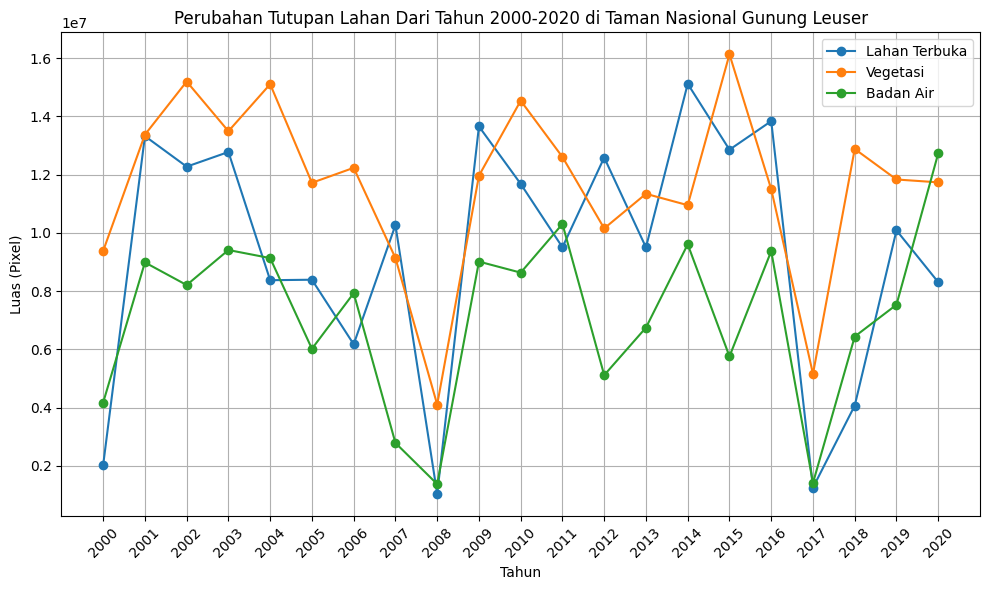

In [ ]:
# Mengubah dictionary ke DataFrame
df = pd.DataFrame(area_dict)

# Plot line chart menggunakan matplotlib
plt.figure(figsize=(10, 6))
plt.plot(df['year'], df['class_0'], label='Lahan Terbuka', marker='o')
plt.plot(df['year'], df['class_1'], label='Vegetasi', marker='o')
plt.plot(df['year'], df['class_2'], label='Badan Air', marker='o')
plt.xlabel('Tahun')
plt.ylabel('Luas (Pixel)')
plt.title('Perubahan Tutupan Lahan Dari Tahun 2000-2020 di Taman Nasional Gunung Leuser')
plt.xticks(df['year'], rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

###`7. Menghasilkan Peta Kualitas Publikasi:`

Membuat sebuah peta dinamik yang menunjukkan perubahan tutupan lahan di Taman Nasional Gunung Leuser dari tahun 2000 hingga 2020.

In [ ]:
d = geemap.Map()
roi = leuser_coords
d.add_layer(roi)
d.center_object(roi)
d

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [ ]:
# Fungsi untuk mendapatkan citra median tahunan
def get_landsat_yearly_median(year):
    start_date = f'{year}-01-01'
    end_date = f'{year}-12-31'
    collection = ee.ImageCollection('LANDSAT/LE07/C01/T1_TOA') \
        .filterDate(start_date, end_date) \
        .filterBounds(roi) \
        .median() \
        .clip(roi)
    return collection

# Buat peta interaktif
Map = geemap.Map(center=[3.8, 97.3], zoom=10)

# Tampilkan peta
Map.addLayer(roi, {}, 'ROI')

# Tampilkan peta dinamis dengan citra Landsat untuk tahun tertentu
landsat_n = get_landsat_yearly_median(2000)
Map.addLayer(landsat_n, {'bands': ['B3', 'B2', 'B1'], 'min': 0, 'max': 0.3}, 'Landsat 2000')

# Tampilkan kontrol waktu
Map.add_time_slider(landsat_n, label="Year", time_interval=1)

# Tampilkan peta
Map

Map(center=[3.8, 97.3], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(c…

Timelapse

In [ ]:
#  Ekstrak nilai pixel untuk titik sampel
training = landsat_yearly.sampleRegions(
     collection=training_samples,
     properties=['landcover'],
     scale=30
  )

# Inisialisasi algoritma Random Forest
classifier = ee.Classifier.smileRandomForest(numberOfTrees=100).train(
     features=training,
     classProperty='landcover',
     inputProperties=landsat_yearly.bandNames()
  )

# Buat koleksi citra hasil klasifikasi tahunan
classified_images = []

# Loop untuk setiap tahun
for year in range(2000, 2021):
    # Dapatkan citra median untuk tahun tertentu
    landsat_yearly = get_landsat_yearly_median(year)

    # Terapkan model ke citra
    classified = landsat_yearly.classify(classifier)
    classified_images.append(classified.set('year', year))

# Gabungkan citra hasil klasifikasi menjadi koleksi
classified_collection = ee.ImageCollection(classified_images)

In [ ]:
# Fungsi untuk membuat gambar dengan label tahun
def add_year_label(image):
    year = ee.Number(image.get('year')).format('%d')
    return image.visualize(min=0, max=2, palette=['yellow', 'green', 'blue']) \
        .set({'label': year})

# Tambahkan label tahun ke setiap citra dalam koleksi
classified_with_labels = classified_collection.map(add_year_label)

# Buat timelapse dari koleksi citra dengan label tahun
out_gif = "landcover_TNGL.gif"


# Tampilkan timelapse
geemap.show_image(out_gif)

Output()

###`8. Mengekstraksi Lebar dan Garis Tengah Sungai:`

Menggunakan GEE untuk mengekstrak informasi mengenai lebar dan garis tengah dari salah satu sungai utama di Taman Nasional Gunung Leuser.

Metode yang digunakan adalah Normalized Difference Water Index (NDWI) yang digunakan untuk identifikasi wilayah perairan atau kandungan air melalui citra. Sehingga dapat dimanfaatkan dalam menganalisis sungai untuk mengetahui garis tengah sungai dan lebarnya, yang mana berbatasan dengan dengan daratan/tanah yang cenderung berbeda kandungan airnya dengan sungai. Maka dari itu, metode ini cocok untuk digunakan.

In [ ]:
# Tentukan area studi di Taman Nasional Gunung Leuser
study_area = fc

# Mengambil citra Landsat untuk analisis
landsat = ee.ImageCollection('LANDSAT/LC08/C01/T1') \
  .filterBounds(study_area) \
  .filterDate('2019-01-01', '2019-12-31') \
  .median()

# Memfilter area air menggunakan indeks NDWI
ndwi = landsat.normalizedDifference(['B3', 'B5'])
water_mask = ndwi.gt(0.2)

# Menemukan tepi sungai menggunakan algoritma Canny
canny_edges = ee.Algorithms.CannyEdgeDetector(ndwi, 0.5)

# Mendefinisikan kernel untuk dilasi dan erosi
dilated = canny_edges.focal_max(1)
eroded = dilated.focal_min(1)

# Konversi Study_area menjadi citra biner
binary_eroded = eroded.gt(0.2).rename('binary_eroded')

# Identifikasi garis tengah sungai
river_centerline = binary_eroded.reduceToVectors(
    geometry=study_area,
    scale=30,
    geometryType='centroid'
)

# Menghitung lebar sungai
river_width = binary_eroded.reduceRegion(
    reducer=ee.Reducer.minMax(),
    geometry=river_centerline.geometry().buffer(30), # buffer untuk memperbesar area
    scale=30,
    bestEffort=True
)

# Print hasil
print("Garis Tengah Sungai:", river_centerline.getInfo())
print("Lebar Sungai (meter):", river_width.getInfo())

# Visualisasi
Maps = geemap.Map(location=[3.8, 97.3], zoom_start=9)

Maps.add_layer(river_centerline, {'color': 'blue'}, "Garis Tengah Sungai")
Maps.add_layer(water_mask, {'palette': 'blue'}, "Area Air")
Maps

Garis Tengah Sungai: {'type': 'FeatureCollection', 'columns': {'count': 'Long<0, 4294967295>', 'label': 'Byte<0, 1>', 'system:index': 'String'}, 'features': [{'type': 'Feature', 'geometry': {'geodesic': False, 'type': 'Point', 'coordinates': [96.9915054682626, 3.8884026230755553]}, 'id': '+359902+14428', 'properties': {'count': 3, 'label': 1}}, {'type': 'Feature', 'geometry': {'geodesic': False, 'type': 'Point', 'coordinates': [97.03174999299115, 3.75172395259677]}, 'id': '+360050+13923', 'properties': {'count': 6, 'label': 1}}, {'type': 'Feature', 'geometry': {'geodesic': False, 'type': 'Point', 'coordinates': [97.03246864521844, 3.736677171587768]}, 'id': '+360053+13865', 'properties': {'count': 1, 'label': 1}}, {'type': 'Feature', 'geometry': {'geodesic': False, 'type': 'Point', 'coordinates': [97.03273813980368, 3.746378976656259]}, 'id': '+360054+13901', 'properties': {'count': 1, 'label': 1}}, {'type': 'Feature', 'geometry': {'geodesic': False, 'type': 'Point', 'coordinates': [97

##**ANALYSIS**

Hasil menunjukkan bahwa setiap tahun selalu terjadi penurunan dan peningkatan berbagai tutupan lahan, dan seiring waktu hal tersebut semakin mengurangi kawasan Taman Nasional Gunung Leuser yang alami akibat transformasi atau perubahan yang terjadi.

Maka dari itu, dengan mengetahui tutupan lahan, kita juga mengetahui fitur lain yang berubah ataupun keberadaannya dapat terdeteksi oleh Citra Satelit. Diantaranya yaitu garis tengah sungai untuk melihat panjang sungai yang ada dikawasan tersebut, serta mengetahui lebar sungai, untuk mengetahui apakah terjadi pelebaran atau pengecilan.

Namun, dataset yang ada masih sangat terbatas karena masih banyak noise oleh awan dan menutupi sebagian wilayah di kawasan Taman Nasional Gunung Leuser. Sehingga kedepannya diharapkan, dataset yang memiliki data lebih baik dapat dimanfaatkan dan dimaksimalkan produksi dan penggunaannya.